# Commit Comment 

- 25 => 13 개로 새롭게 분류한 선종에 대한 레이블 업데이트 
- Validation Dataset 만들기 

In [1]:
# libs 
from PIL import Image
import matplotlib.patches as patches
import matplotlib as mpl
from glob import glob
import xml.etree.ElementTree as elemTree
import math 
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import exposure

In [2]:
# parsing multiple objects 

# ann_files 
anno_root = "/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/VOC_Format/Annotations/*"
ann_files = glob(anno_root)


# file_name load 
sample_id = "100001678"
ann_sample_full = f"/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/VOC_Format/Annotations/{sample_id}.xml"
img_sample_full = f"/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/VOC_Format/JPEGImages/{sample_id}.bmp"


#----------------------------------------------------
# center box 
tree = elemTree.parse(ann_sample_full)
root = tree.getroot()

In [3]:
# def extract values from ann 
def extract_values(tree):
    
    a = tree.findall(".//object")
    boxes = []
    for q in range(len(a)):
        category_level_ = a[q].findall("level_2")[0].text
        polygon_ = [float(a[q].findall("polygon")[0][i].text) for i in range(8)]
        
        a_box = polygon_ + [category_level_] 
        boxes.append( a_box  )
    return boxes


In [4]:
# ann_files 
anno_root = "/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/VOC_Format/Annotations/*"
ann_files = glob(anno_root)


Bboxes = []
for ann_file in ann_files:
    
    print(ann_file)
    # center box 
    tree = elemTree.parse(ann_file)
    # root = tree.getroot()    
    result = extract_values(tree)
    Bboxes.append(result)


/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/VOC_Format/Annotations/000686.xml
/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/VOC_Format/Annotations/1702__920_0.xml
/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/VOC_Format/Annotations/1208__0_1961.xml
/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/VOC_Format/Annotations/100001120.xml
/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/VOC_Format/Annotations/001207.xml
/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/VOC_Format/Annotations/1442__0_920.xml
/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/VOC_Format/Annotations/1452__1840_920.xml
/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/VOC_Format/Annotations/000807.xml
/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/VOC_Format/Annotations/1896__0_0.xml
/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/VOC_Format/Annotations/0

In [16]:
len(ann_files)

2748

In [17]:
# # Level 2 Cateogry Table 

# level_2_table = ['Other_Ship',   => Warship
#                  'Other_Warship', => Warship
#                  'Submarine', => Submarine
#                  'Other_Aircraft_Carrier',  => Other_Aircraft_Carrier
#                  'Ticonderoga', => Warship
#                  'Other_Destroyer', => Warship
#                  'Other_Frigate', => Warship
#                  'Patrol', => Warship
#                  'Other_Landing', => Warship
#                  'Commander', => Warship
#                  'Other_Auxiliary_Ship',=> Warship
#                  'Other_Merchant', => Cargo 
#                  'Container_Ship', => Container_Ship
#                  'RoRo', => RoRo
#                  'Cargo', => Cargo
#                  'Barge', => Barge
#                  'Tugboat', => Cargo
#                  'Ferry', => Cargo
#                  'Yacht', => Yacht
#                  'Sailboat', => Yacht
#                  'Fishing_Vessel', => Fishing_Vessel
#                  'Oil_Tanker', => Oil_Tanker
#                  'Hovercraft', => Hovercraft
#                  'Motorboat',  => Motorboat
#                  'Dock']  => Dock


#------- 
# This is 15 sorts of category version !!! 
level_2_table = ['Warship',
                 'Warship', 
                 'Submarine', 
                 'Other_Aircraft_Carrier', 
                 'Warship', 
                 'Warship', 
                 'Warship', 
                 'Warship', 
                 'Warship',
                 'Warship', 
                 'Warship', 
                 'Cargo', 
                 'Container_Ship', 
                 'RoRo', 
                 'Cargo',
                 'Barge', 
                 'Cargo', 
                 'Cargo', 
                 'Yacht', 
                 'Yacht', 
                 'Fishing_Vessel', 
                 'Oil_Tanker', 
                 'Hovercraft',
                 'Motorboat',
                 'Dock']

In [18]:
len(set(level_2_table))

13

In [19]:
set(level_2_table)

{'Barge',
 'Cargo',
 'Container_Ship',
 'Dock',
 'Fishing_Vessel',
 'Hovercraft',
 'Motorboat',
 'Oil_Tanker',
 'Other_Aircraft_Carrier',
 'RoRo',
 'Submarine',
 'Warship',
 'Yacht'}

In [20]:
# converting from xml to txt in dota format  
# EDA 통해서 제대로 바꿨나 검증 ! 

target_root = "/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_15/anns"

for idx, file_name in enumerate( ann_files ):
    #print(file_name)
    z = file_name.split("/")[-1].split(".")[0]
    txt_name = os.path.join(target_root, f"{z}.txt")

    f = open(txt_name, "w")
    
    a = Bboxes[idx]
    for box in a:
        print(box)
        #box = box.split(",")
        #box = [float(i) for i in box]
        print(txt_name)
        print(box[0],box[1],box[2],box[3],box[4],box[5],box[6],box[7], level_2_table[int(box[8]) -1], 0 , "\n")
        f.write(f"{box[0]} {box[1]} {box[2]} {box[3]} {box[4]} {box[5]} {box[6]} {box[7]} {level_2_table[int(box[8]) -1]} 0 \n")



[124.0, 55.0, 27.0, 185.0, 796.0, 757.0, 893.0, 627.0, '6']
/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_15/anns/000686.txt
124.0 55.0 27.0 185.0 796.0 757.0 893.0 627.0 Warship 0 

[536.0, 20.0, 547.0, 26.0, 557.0, 7.0, 547.0, 1.0, '20']
/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_15/anns/1702__920_0.txt
536.0 20.0 547.0 26.0 557.0 7.0 547.0 1.0 Yacht 0 

[549.0, 24.0, 560.0, 30.0, 572.0, 7.0, 562.0, 1.0, '20']
/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_15/anns/1702__920_0.txt
549.0 24.0 560.0 30.0 572.0 7.0 562.0 1.0 Yacht 0 

[565.0, 26.0, 575.0, 31.0, 587.0, 9.0, 577.0, 4.0, '20']
/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_15/anns/1702__920_0.txt
565.0 26.0 575.0 31.0 587.0 9.0 577.0 4.0 Yacht 0 

[575.0, 32.0, 587.0, 38.0, 602.0, 10.0, 591.0, 4.0, '20']
/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/

In [126]:
# DOTA_Format_with_Category
# anns
# images
# images_png
# valid


'''
wordname_50 = ['Other Ship', 'Other Warship', 'Submarine', 'Other Aircraft Carrier', 'Enterprise', 'Nimitz', 'Midway','Ticonderoga',
        'Other Destroyer', 'Atago DD', 'Arleigh Burke DD', 'Hatsuyuki DD', 'Hyuga DD','Asagiri DD', 'Other Frigate', 'Perry FF',
        'Patrol', 'Other Landing', 'YuTing LL','YuDeng LL', 'YuDao LL', 'YuZhao LL', 'Austin LL', 'Osumi LL',
        'Wasp LL','LSD 41 LL', 'LHA LL', 'Commander', 'Other Auxiliary Ship', 'Medical Ship', 'Test Ship', 'Training Ship',
        'AOE', 'Masyuu AS', 'Sanantonio AS', 'EPF', 'Other Merchant', 'Container Ship', 'RoRo', 'Cargo',
        'Barge', 'Tugboat', 'Ferry', 'Yacht', 'Sailboat', 'Fishing Vessel', 'Oil Tanker', 'Hovercraft',
        'Motorboat','Dock']

'''


"\nwordname_50 = ['Other Ship', 'Other Warship', 'Submarine', 'Other Aircraft Carrier', 'Enterprise', 'Nimitz', 'Midway','Ticonderoga',\n        'Other Destroyer', 'Atago DD', 'Arleigh Burke DD', 'Hatsuyuki DD', 'Hyuga DD','Asagiri DD', 'Other Frigate', 'Perry FF',\n        'Patrol', 'Other Landing', 'YuTing LL','YuDeng LL', 'YuDao LL', 'YuZhao LL', 'Austin LL', 'Osumi LL',\n        'Wasp LL','LSD 41 LL', 'LHA LL', 'Commander', 'Other Auxiliary Ship', 'Medical Ship', 'Test Ship', 'Training Ship',\n        'AOE', 'Masyuu AS', 'Sanantonio AS', 'EPF', 'Other Merchant', 'Container Ship', 'RoRo', 'Cargo',\n        'Barge', 'Tugboat', 'Ferry', 'Yacht', 'Sailboat', 'Fishing Vessel', 'Oil Tanker', 'Hovercraft',\n        'Motorboat','Dock']\n\n"

In [21]:
# image_png 내에 png 파일 외에 잡스러운 파일들 전부 지우기 

root_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/images_png"

In [24]:
import os 
len(os.listdir("/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/images_png"))

3436

In [23]:
import os

root_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/images_png"

# List all files in the directory
file_list = os.listdir(root_path)

# Filter out files that don't end with ".png"
files_to_remove = [file for file in file_list if not file.endswith(".png")]

# Remove the files
for file_to_remove in files_to_remove:
    file_path = os.path.join(root_path, file_to_remove)
    os.remove(file_path)
    print(f"Removed: {file_path}")

Removed: /mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/images_png/000183.txt
Removed: /mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/images_png/1b8a489c6.txt
Removed: /mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/images_png/001210.txt
Removed: /mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/images_png/000615.txt
Removed: /mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/images_png/000277.txt
Removed: /mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/images_png/2000000008.txt
Removed: /mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/images_png/100001068.txt
Removed: /mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/images_png/002029.tx

# Validation Dataset 만들기 

- Train Distribution 확인하기

In [55]:
from glob import glob
import os
from collections import defaultdict
import matplotlib.pyplot as plt

# random 20%

source_folder = "/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/anns"
target_folder = "/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/valid/anns"  # Replace with the actual target folder path

In [56]:
end_fix = "*.txt"
ann_files = glob(os.path.join(source_folder, end_fix))

# process all 

# This is counter map 
Category_map = defaultdict(int)

for file_path in ann_files:
    with open(file_path, 'r') as file:
        # Read the entire content of the file into a string
        file_content = file.read()

    lines = file_content.split('\n')
    lines = lines[:-1]

        # Iterate over each line
    for line in lines:
        # Split the line into individual elements
        elements = line.split()

        # Extract the coordinates (assuming each coordinate is a pair of x and y)
        coordinates = [(float(elements[i]), float(elements[i + 1])) for i in range(0, len(elements) - 2, 2)]

        # Extract label and numerical value
        label = elements[-2]
        numerical_value = int(elements[-1])

        # Print or process the extracted information as needed
        #print("Coordinates:", coordinates)
        print("Label:", label)
        #print("Numerical Value:", numerical_value)
        #print("\n")
        
        #---------------------- map add 
        Category_map[label] +=1 

Label: Warship
Label: Cargo
Label: Submarine
Label: Submarine
Label: Submarine
Label: Warship
Label: Warship
Label: Dock
Label: Submarine
Label: Submarine
Label: Submarine
Label: Submarine
Label: Submarine
Label: Submarine
Label: Submarine
Label: Submarine
Label: Submarine
Label: Submarine
Label: Submarine
Label: Submarine
Label: RoRo
Label: Dock
Label: RoRo
Label: Cargo
Label: Warship
Label: Warship
Label: Warship
Label: Warship
Label: Warship
Label: Warship
Label: Container_Ship
Label: Hovercraft
Label: Cargo
Label: Container_Ship
Label: Motorboat
Label: Cargo
Label: Warship
Label: Warship
Label: Warship
Label: RoRo
Label: Warship
Label: Warship
Label: Cargo
Label: Warship
Label: Warship
Label: Warship
Label: Warship
Label: Warship
Label: Warship
Label: Warship
Label: Warship
Label: Warship
Label: Warship
Label: Warship
Label: Warship
Label: Warship
Label: Warship
Label: Warship
Label: Warship
Label: Warship
Label: Warship
Label: Warship
Label: Warship
Label: Cargo
Label: Warship
Lab

In [57]:
Category_map

defaultdict(int,
            {'Warship': 6124,
             'Cargo': 1513,
             'Submarine': 837,
             'Dock': 898,
             'RoRo': 127,
             'Container_Ship': 304,
             'Hovercraft': 257,
             'Motorboat': 1588,
             'Oil_Tanker': 161,
             'Barge': 183,
             'Fishing_Vessel': 417,
             'Yacht': 1307,
             'Other_Aircraft_Carrier': 242})

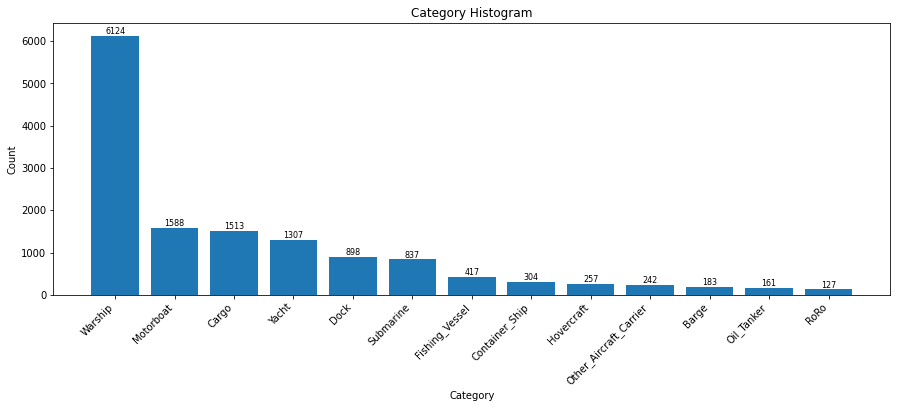

In [59]:
# Extract labels and counts
# labels = list(Category_map.keys())
# counts = list(Category_map.values())
sorted_labels, sorted_counts = zip(*sorted(Category_map.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(15,5))

# Create a bar chart
bars = plt.bar(sorted_labels, sorted_counts)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Histogram')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Add count labels on top of the bars
for bar, count in zip(bars, sorted_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', fontsize=8)

# Show the plot
plt.show()

- random 10 % => Validation

In [62]:
# Random 10 % 

import os
import shutil
import random

percentage_to_copy = 0.05  # 10%

# List all files in the source folder
file_list = os.listdir(source_folder)

# Calculate the number of files to copy (20% of the total)
num_files_to_copy = int(len(file_list) * percentage_to_copy)

# Randomly select files to copy
files_to_copy = random.sample(file_list, num_files_to_copy)

print("source_folder : ", len(file_list))
print("valid folder : ", len(files_to_copy))

source_folder :  2748
valid folder :  137


Label: RoRo
Label: Warship
Label: Warship
Label: Dock
Label: Dock
Label: Dock
Label: Dock
Label: Warship
Label: Warship
Label: Warship
Label: Warship
Label: Warship
Label: Warship
Label: Other_Aircraft_Carrier
Label: Container_Ship
Label: Cargo
Label: Cargo
Label: Cargo
Label: Cargo
Label: Cargo
Label: Motorboat
Label: Warship
Label: Warship
Label: Warship
Label: Warship
Label: Oil_Tanker
Label: Container_Ship
Label: Cargo
Label: Warship
Label: Warship
Label: Warship
Label: Warship
Label: Warship
Label: Warship
Label: Warship
Label: Warship
Label: Warship
Label: Warship
Label: Warship
Label: Barge
Label: Yacht
Label: Cargo
Label: Warship
Label: Cargo
Label: Yacht
Label: Warship
Label: Yacht
Label: Yacht
Label: Yacht
Label: Yacht
Label: Yacht
Label: Yacht
Label: Yacht
Label: Yacht
Label: Yacht
Label: Yacht
Label: Yacht
Label: Yacht
Label: Yacht
Label: Yacht
Label: Yacht
Label: Yacht
Label: Yacht
Label: Warship
Label: Yacht
Label: Yacht
Label: Yacht
Label: Yacht
Label: Yacht
Label: Yacht

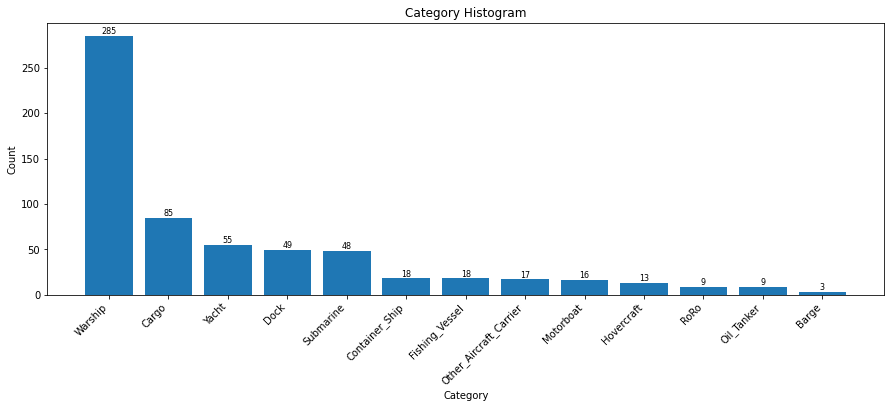

In [76]:
from glob import glob
import os
from collections import defaultdict
import matplotlib.pyplot as plt

# random 5%

source_folder = "/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/anns"
#target_folder = "/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/valid/anns"  # Replace with the actual target folder path

end_fix = "*.txt"
train_ann_files = glob(os.path.join(source_folder, end_fix))

#----------------------------- 
percentage_to_copy = 0.05  # 10%

# Calculate the number of files to copy (20% of the total)
num_files_to_copy = int(len(train_ann_files) * percentage_to_copy)

# Randomly select files to copy
files_to_copy = random.sample(train_ann_files, num_files_to_copy)
ann_files = files_to_copy


# process all 

# This is counter map 
Category_map = defaultdict(int)

for file_path in ann_files:
    with open(file_path, 'r') as file:
        # Read the entire content of the file into a string
        file_content = file.read()

    lines = file_content.split('\n')
    lines = lines[:-1]

        # Iterate over each line
    for line in lines:
        # Split the line into individual elements
        elements = line.split()

        # Extract the coordinates (assuming each coordinate is a pair of x and y)
        coordinates = [(float(elements[i]), float(elements[i + 1])) for i in range(0, len(elements) - 2, 2)]

        # Extract label and numerical value
        label = elements[-2]
        numerical_value = int(elements[-1])

        # Print or process the extracted information as needed
        #print("Coordinates:", coordinates)
        print("Label:", label)
        #print("Numerical Value:", numerical_value)
        #print("\n")
        
        #---------------------- map add 
        Category_map[label] +=1 


# Extract labels and counts
# labels = list(Category_map.keys())
# counts = list(Category_map.values())
sorted_labels, sorted_counts = zip(*sorted(Category_map.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(15,5))

# Create a bar chart
bars = plt.bar(sorted_labels, sorted_counts)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Histogram')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Add count labels on top of the bars
for bar, count in zip(bars, sorted_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', fontsize=8)

# Show the plot
plt.show()

In [77]:
len(files_to_copy)

137

In [78]:
files_to_copy

['/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/anns/100001578.txt',
 '/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/anns/001213.txt',
 '/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/anns/100000979.txt',
 '/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/anns/100001095.txt',
 '/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/anns/100001089.txt',
 '/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/anns/100001521.txt',
 '/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/anns/100001114.txt',
 '/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/anns/1379__0_2128.txt',
 '/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_F

In [80]:
# Random 10 % 

target_folder = "/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/new_valid/anns"
for file_to_copy in files_to_copy:

    filename = file_to_copy.split("/")[-1]
    target_path = os.path.join(target_folder, filename)
    
    # Use shutil.copy to copy the file
    shutil.move(file_to_copy, target_path) # train 에 있는 걸 옮김!
    
    print(f"Copied: {file_to_copy} to {target_path}")


Copied: /mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/anns/100001578.txt to /mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/new_valid/anns/100001578.txt
Copied: /mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/anns/001213.txt to /mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/new_valid/anns/001213.txt
Copied: /mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/anns/100000979.txt to /mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/new_valid/anns/100000979.txt
Copied: /mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/anns/100001095.txt to /mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/new_valid/anns/100001095.txt
Copied: /mnt/hdd/eric/.tmp

In [84]:
[i.replace("/anns", "/images_png").replace(".txt",".png") for i in files_to_copy]

['/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/images_png/100001578.png',
 '/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/images_png/001213.png',
 '/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/images_png/100000979.png',
 '/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/images_png/100001095.png',
 '/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/images_png/100001089.png',
 '/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/images_png/100001521.png',
 '/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/images_png/100001114.png',
 '/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/images_png/1379__0_2128.png',
 '/mnt/hdd/eric/.tmp_ipy

In [87]:
# move Image files 

source_files = [i.replace("/anns", "/images_png").replace(".txt",".png") for i in files_to_copy]

target_folder = "/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/new_valid/images_png"
for file_to_copy in source_files:

    filename = file_to_copy.split("/")[-1]
    target_path = os.path.join(target_folder, filename)
    
    # Use shutil.copy to copy the file
    shutil.copy(file_to_copy, target_path) # train 에 있는 걸 옮김!
    
    print(f"Copied: {file_to_copy} to {target_path}")


Copied: /mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/images_png/100001578.png to /mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/new_valid/images_png/100001578.png
Copied: /mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/images_png/001213.png to /mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/new_valid/images_png/001213.png
Copied: /mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/images_png/100000979.png to /mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/new_valid/images_png/100000979.png
Copied: /mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/images_png/100001095.png to /mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/new_valid/ima

In [89]:
len(os.listdir("/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/new_valid/images_png"))

137

In [94]:
len(os.listdir("/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category_13/anns"))

2611

In [95]:
len(os.listdir("/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/DOTA_Format_with_Category/anns"))

2748